🧹 02 - Feature Engineering & Visualization

🎯 Objectives
- Engineer useful new features from raw Bitcoin price data.
- Perform quick exploratory visualizations to understand the new features.
- Save the enhanced dataset for modeling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [23]:
## 📥 Load Processed Data
data_path = "../data/processed/btc_clean.csv"
df = pd.read_csv(data_path)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2012-04-01,4.8,4.9,4.9,4.7,35950.0,-1.63
1,2012-04-02,5.0,4.8,5.1,4.8,80660.0,2.90
2,2012-04-03,4.9,5.0,5.0,4.8,78480.0,0.00
3,2012-04-04,4.9,4.9,5.0,4.9,51040.0,0.00
4,2012-04-05,4.9,4.9,4.9,4.9,33810.0,0.00


In [16]:
# Feature Engineering

# (a) Lag Features: yesterday's price, 2-days-ago price, etc.
df['Price_lag1'] = df['Price'].shift(1)
df['Price_lag2'] = df['Price'].shift(2)

# (b) Moving Averages
df['MA7'] = df['Price'].rolling(window=7).mean()
df['MA30'] = df['Price'].rolling(window=30).mean()

# (c) Price change from previous day
df['Price_change_1d'] = df['Price'] - df['Price_lag1']

# (d) Volatility (High - Low)
df['Volatility'] = df['High'] - df['Low']

# (e) Relative Strength Index (RSI)
def compute_RSI(data, window=14):
    delta = data['Price'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

df['RSI14'] = compute_RSI(df, window=14)

# (f) Daily % Return
df['Daily_Return_pct'] = df['Price'].pct_change() * 100

# (g) Rolling Volatility (Standard Deviation)
df['Rolling_volatility_7d'] = df['Price'].rolling(window=7).std()


📊 Feature Visualizations

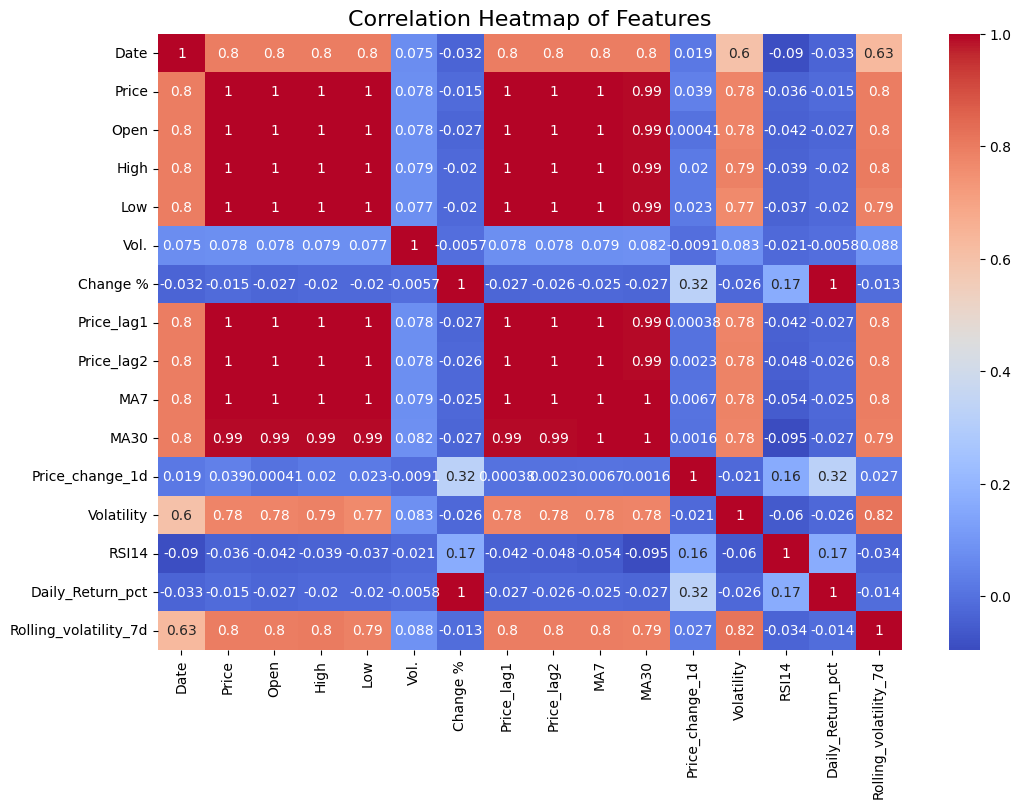

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

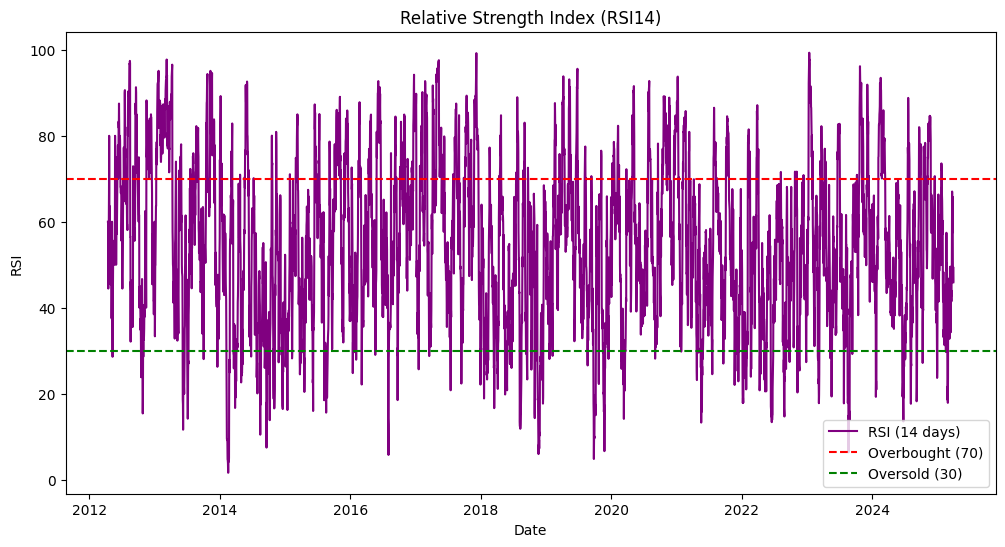

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['RSI14'], label='RSI (14 days)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI14)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


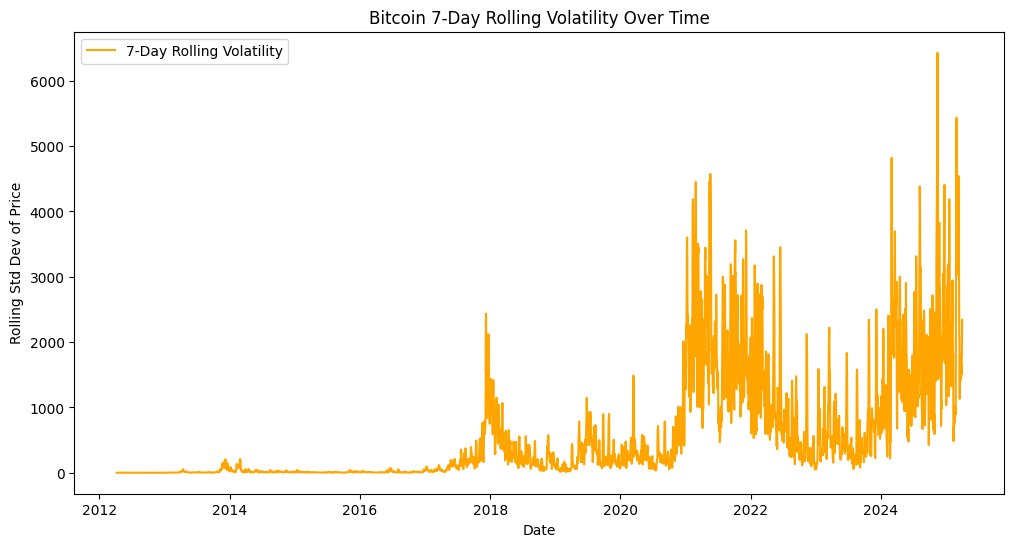

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Rolling_volatility_7d'], label='7-Day Rolling Volatility', color='orange')
plt.title('Bitcoin 7-Day Rolling Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Rolling Std Dev of Price')
plt.legend()
plt.show()


In [20]:
df = df.dropna()

print("✅ Feature engineering done!")
display(df.head())

✅ Feature engineering done!


,Date,Price,Open,High,Low,Vol.,Change %,Price_lag1,Price_lag2,MA7,MA30,Price_change_1d,Volatility,RSI14,Daily_Return_pct,Rolling_volatility_7d
29,2012-04-30,4.9,4.9,5.0,4.9,55770.0,0.00,4.9,5.0,5.028571,4.980000,0.0,0.1,50.0,0.000000,0.095119
30,2012-05-01,5.0,4.9,5.0,4.9,36680.0,1.01,4.9,4.9,5.014286,4.986667,0.1,0.1,50.0,2.040816,0.089974
31,2012-05-02,5.1,5.0,5.2,5.0,95960.0,1.40,5.0,4.9,5.014286,4.990000,0.1,0.2,50.0,2.000000,0.089974
32,2012-05-03,5.1,5.1,5.2,5.0,35420.0,1.18,5.1,5.0,5.014286,4.996667,0.0,0.2,50.0,0.000000,0.089974
33,2012-05-04,5.1,5.1,5.2,5.1,43630.0,-1.17,5.1,5.1,5.014286,5.003333,0.0,0.1,37.5,0.000000,0.089974


In [21]:
processed_feature_data_path = "../data/processed/btc_features.csv"
df.to_csv(processed_feature_data_path, index=False)
print(f"✅ Features saved to {processed_feature_data_path}")

✅ Features saved to ../data/processed/btc_features.csv
